In [34]:
# Sharing some hot keys to help with editing. Happy Coding, team.
#
# To add a new cell, type '#%%'
# To add a new markdown cell, type '#%% [markdown]'
# To undo 'ctrl + Z'
# To wrap for long text 'alt + Z'
# To edit multiple line 'ctrl + alt + arrow'
# To comment out code 'ctrl + /'
# To edit text with the same content 'ctrl + shift + L'

# DAT - 6103 - Data Mining - Final Project

 Team 2 Members:
 *  Tianyi Wang
 *  Baldur Hua
 *  Chiemeziem Oguayo
 *  Meg Elliott Fitzgerald

# Introduction
 The average American is over $5,000 in credit card debt, a figure that’s back on the rise now that household spending has recovered from the 2019 pandemic-induced lull. This exceeds the average amount of credit card debt in any other country, and will likely only increase as times goes on if current trends continue. With so many of us frequently relying on credit cards, it behooves us to understand the patterns and profiles associated with credit card usage. Armed with this knowledge, we are able to recognize when certain characteristics make individuals more likely to accrue large balances or default on payments. For instance, based on data collected by Shift, on average men, individuals between the ages of 45-54, Generation X’ers, and those making more than $160,000 per year have the highest amount of credit card debt. By analyzing our dataset we hope to develop multi-dimensional profiles of credit card customers, and then explore whether these profiles are helpful in predicting credit card usage and payment behavior. In short, we hope to answer the following questions:

   1. Can we unveil the relationship between individuals’ financial condition and their personal condition?

   2. Most importantly, can we develop customer profiles using clustering based on applicant data in order to predict future account behavior at the end?

 * [Data Source](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

 * [GitHub Link](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

 Data Description (Application.csv):
 * ID:	Client               number
 * CODE_GENDER:	         Gender
 * FLAG_OWN_CAR:	         Is there a car
 * FLAG_OWN_REALTY:	     Is there a property
 * CNT_CHILDREN:	         Number of children
 * AMT_INCOME_TOTAL:	     Annual income
 * NAME_INCOME_TYPE:	     Income category
 * NAME_EDUCATION_TYPE:	 Education level
 * NAME_FAMILY_STATUS:	     Marital status
 * NAME_HOUSING_TYPE:	     Way of living
 * DAYS_BIRTH	Birthday:
                            Count backwards from current day (0),  -1 means yesterday
 * DAYS_EMPLOYED:	         Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
 * FLAG_MOBIL:	             Is there a mobile phone
 * FLAG_WORK_PHONE:	     Is there a work phone
 * FLAG_PHONE:	             Is there a phone
 * FLAG_EMAIL:	             Is there an email
 * OCCUPATION_TYPE:	     Occupation
 * CNT_FAM_MEMBERS:	     Family size

 Data Decription (Credit.csv)
 * ID:	               Client number
 * MONTHS_BALANCE:	   The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
 * STATUS:	           0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Preprocessing & EDA
 In preprocessing part, we will clean the data set, making sure that they are in the right shape(eg. join data sets, remove(replace) NA values,
 correct data type, etc)

 In EDA part, a detailed summary of the data will be presented, along with graphs and test, preparing for the later model building
 proccess.

In [35]:
import os
import numpy as np
import pandas as pd
# import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [36]:
filepath = os.path.join(os.getcwd())
app = pd.read_csv(os.path.join(filepath, "application.csv"))
app.head(n = 3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [37]:
filepath2 = os.path.join(os.getcwd())
credit = pd.read_csv(os.path.join(filepath2, "credit.csv"))
credit.head(n = 3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [38]:
# Check the discussion here: https://www.kaggle.com/rikdifos/credit-card-approval-prediction/discussion/119320

# To get the wide table
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # define > 60 days past-due

df = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

In [39]:
df.head(n = 3)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X


In [40]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL','OCCUPATION_TYPE','CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)

    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']/365)
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365 

    # housing_type = {'House / apartment' : 'House / apartment',
    #                'With parents': 'With parents',
    #                 'Municipal apartment' : 'House / apartment',
    #                 'Rented apartment': 'House / apartment',
    #                 'Office apartment': 'House / apartment',
    #                 'Co-op apartment': 'House / apartment'}
              
    # income_type = {'Commercial associate':'Working',
    #               'State servant':'Working',
    #               'Working':'Working',
    #               'Pensioner':'Pensioner',
    #               'Student':'Student'}
    # education_type = {'Secondary / secondary special':'secondary',
    #                  'Lower secondary':'secondary',
    #                  'Higher education':'Higher education',
    #                  'Incomplete higher':'Higher education',
    #                  'Academic degree':'Academic degree'}
    # family_status = {'Single / not married':'Single',
    #                  'Separated':'Single',
    #                  'Widow':'Single',
    #                  'Civil marriage':'Married',
    #                 'Married':'Married'}
    # data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    # data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    # data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    # data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
    return data

cleansed_app = data_cleansing(app)

In [41]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['pay_off']
        over_1 = row['overdue_1-29']
        over_30 = row['overdue_30-59']
        over_60 = row['overdue_60-89'] 
        over_90 = row['overdue_90-119']
        over_120 = row['overdue_120-149'] + row['overdue_over_150']
        no_loan = row['no_loan']
            
        overall_overdues = over_1+over_30+over_60+over_90+over_120    
            
        if overall_overdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)
        
        elif overall_overdues != 0:
            if paid_off > overall_overdues:
                good_or_bad.append(1)
            elif paid_off <= overall_overdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_overdues <= no_loan or overall_overdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)
                
        
    return good_or_bad

In [42]:
# Inner Join two data sets with intersection ID.
# df = pd.merge(app, df, how="inner", on=["ID", "ID"])
# df.head(3)

In [43]:
df['pay_off'] = df[df.iloc[:,18:79] == 'C'].count(axis = 1)
df['overdue_1-29'] = df[df.iloc[:,18:79] == '0'].count(axis = 1)
df['overdue_30-59'] = df[df.iloc[:,18:79] == '1'].count(axis = 1)
df['overdue_60-89'] = df[df.iloc[:,18:79] == '2'].count(axis = 1)
df['overdue_90-119'] = df[df.iloc[:,18:79] == '3'].count(axis = 1)
df['overdue_120-149'] = df[df.iloc[:,18:79] == '4'].count(axis = 1)
df['overdue_over_150'] = df[df.iloc[:,18:79] == '5'].count(axis = 1)
df['no_loan'] = df[df.iloc[:,18:79] == 'X'].count(axis = 1)
df['ID'] = df.index

In [44]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)

In [45]:
df_merge = cleansed_app.merge(app, df, how="inner", on=["ID", "ID"])
df_merge.head(10)

TypeError: merge() got multiple values for argument 'how'

In [46]:
df_merge = cleansed_app.merge(app, df, how="inner", on=["ID", "ID"])
df_merge.head(10)

TypeError: merge() got multiple values for argument 'how'

In [47]:
import os
import pandas as pd
import numpy as np
# from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

filepath = os.path.join(os.getcwd())
app = pd.read_csv(os.path.join(filepath, "application.csv"))
filepath2 = os.path.join(os.getcwd())
credit = pd.read_csv(os.path.join(filepath2, "credit.csv"))

app.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep = 'first', inplace = True)

grouped = credit.groupby('ID')

pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL','OCCUPATION_TYPE','CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)
    
    #converting birth years and days employed to years.
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']/365)
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365 
    
    #Cleaning up categorical values to lower the count of dummy variables.
    housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}
              
    income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}
    education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}
    family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}
    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
    return data

cleansed_app = data_cleansing(app)

def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89'] 
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']
            
        overall_pastdues = over_1+over_30+over_60+over_90+over_120    
            
        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)
        
        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)
                
        
    return good_or_bad

target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values + pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values
target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
credit_app = cleansed_app.merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

In [48]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [49]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)
df_merge = cleansed_app.merge(app, df, how="inner", on=["ID", "ID"])
df_merge.head(10)

KeyError: 'paid_off'

In [50]:
# Sharing some hot keys to help with editing. Happy Coding, team.
#
# To add a new cell, type '#%%'
# To add a new markdown cell, type '#%% [markdown]'
# To undo 'ctrl + Z'
# To wrap for long text 'alt + Z'
# To edit multiple line 'ctrl + alt + arrow'
# To comment out code 'ctrl + /'
# To edit text with the same content 'ctrl + shift + L'

# DAT - 6103 - Data Mining - Final Project

 Team 2 Members:
 *  Tianyi Wang
 *  Baldur Hua
 *  Chiemeziem Oguayo
 *  Meg Elliott Fitzgerald

# Introduction
 The average American is over $5,000 in credit card debt, a figure that’s back on the rise now that household spending has recovered from the 2019 pandemic-induced lull. This exceeds the average amount of credit card debt in any other country, and will likely only increase as times goes on if current trends continue. With so many of us frequently relying on credit cards, it behooves us to understand the patterns and profiles associated with credit card usage. Armed with this knowledge, we are able to recognize when certain characteristics make individuals more likely to accrue large balances or default on payments. For instance, based on data collected by Shift, on average men, individuals between the ages of 45-54, Generation X’ers, and those making more than $160,000 per year have the highest amount of credit card debt. By analyzing our dataset we hope to develop multi-dimensional profiles of credit card customers, and then explore whether these profiles are helpful in predicting credit card usage and payment behavior. In short, we hope to answer the following questions:

   1. Can we unveil the relationship between individuals’ financial condition and their personal condition?

   2. Most importantly, can we develop customer profiles using clustering based on applicant data in order to predict future account behavior at the end?

 * [Data Source](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

 * [GitHub Link](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

 Data Description (Application.csv):
 * ID:	Client               number
 * CODE_GENDER:	         Gender
 * FLAG_OWN_CAR:	         Is there a car
 * FLAG_OWN_REALTY:	     Is there a property
 * CNT_CHILDREN:	         Number of children
 * AMT_INCOME_TOTAL:	     Annual income
 * NAME_INCOME_TYPE:	     Income category
 * NAME_EDUCATION_TYPE:	 Education level
 * NAME_FAMILY_STATUS:	     Marital status
 * NAME_HOUSING_TYPE:	     Way of living
 * DAYS_BIRTH	Birthday:
                            Count backwards from current day (0),  -1 means yesterday
 * DAYS_EMPLOYED:	         Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
 * FLAG_MOBIL:	             Is there a mobile phone
 * FLAG_WORK_PHONE:	     Is there a work phone
 * FLAG_PHONE:	             Is there a phone
 * FLAG_EMAIL:	             Is there an email
 * OCCUPATION_TYPE:	     Occupation
 * CNT_FAM_MEMBERS:	     Family size

 Data Decription (Credit.csv)
 * ID:	               Client number
 * MONTHS_BALANCE:	   The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
 * STATUS:	           0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Preprocessing & EDA
 In preprocessing part, we will clean the data set, making sure that they are in the right shape(eg. join data sets, remove(replace) NA values,
 correct data type, etc)

 In EDA part, a detailed summary of the data will be presented, along with graphs and test, preparing for the later model building
 proccess.

In [51]:
import os
import numpy as np
import pandas as pd
# import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [52]:
filepath = os.path.join(os.getcwd())
app = pd.read_csv(os.path.join(filepath, "application.csv"))
app.head(n = 3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [53]:
filepath2 = os.path.join(os.getcwd())
credit = pd.read_csv(os.path.join(filepath2, "credit.csv"))
credit.head(n = 3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [54]:
# Check the discussion here: https://www.kaggle.com/rikdifos/credit-card-approval-prediction/discussion/119320

# To get the wide table
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # define > 60 days past-due

df = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

In [55]:
df.head(n = 3)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X


In [56]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL','OCCUPATION_TYPE','CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)

    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']/365)
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365 

    # housing_type = {'House / apartment' : 'House / apartment',
    #                'With parents': 'With parents',
    #                 'Municipal apartment' : 'House / apartment',
    #                 'Rented apartment': 'House / apartment',
    #                 'Office apartment': 'House / apartment',
    #                 'Co-op apartment': 'House / apartment'}
              
    # income_type = {'Commercial associate':'Working',
    #               'State servant':'Working',
    #               'Working':'Working',
    #               'Pensioner':'Pensioner',
    #               'Student':'Student'}
    # education_type = {'Secondary / secondary special':'secondary',
    #                  'Lower secondary':'secondary',
    #                  'Higher education':'Higher education',
    #                  'Incomplete higher':'Higher education',
    #                  'Academic degree':'Academic degree'}
    # family_status = {'Single / not married':'Single',
    #                  'Separated':'Single',
    #                  'Widow':'Single',
    #                  'Civil marriage':'Married',
    #                 'Married':'Married'}
    # data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    # data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    # data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    # data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
    return data

cleansed_app = data_cleansing(app)

In [57]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['pay_off']
        over_1 = row['overdue_1-29']
        over_30 = row['overdue_30-59']
        over_60 = row['overdue_60-89'] 
        over_90 = row['overdue_90-119']
        over_120 = row['overdue_120-149'] + row['overdue_over_150']
        no_loan = row['no_loan']
            
        overall_overdues = over_1+over_30+over_60+over_90+over_120    
            
        if overall_overdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)
        
        elif overall_overdues != 0:
            if paid_off > overall_overdues:
                good_or_bad.append(1)
            elif paid_off <= overall_overdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_overdues <= no_loan or overall_overdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)
                
        
    return good_or_bad

In [58]:
# Inner Join two data sets with intersection ID.
# df = pd.merge(app, df, how="inner", on=["ID", "ID"])
# df.head(3)

In [59]:
df['pay_off'] = df[df.iloc[:,18:79] == 'C'].count(axis = 1)
df['overdue_1-29'] = df[df.iloc[:,18:79] == '0'].count(axis = 1)
df['overdue_30-59'] = df[df.iloc[:,18:79] == '1'].count(axis = 1)
df['overdue_60-89'] = df[df.iloc[:,18:79] == '2'].count(axis = 1)
df['overdue_90-119'] = df[df.iloc[:,18:79] == '3'].count(axis = 1)
df['overdue_120-149'] = df[df.iloc[:,18:79] == '4'].count(axis = 1)
df['overdue_over_150'] = df[df.iloc[:,18:79] == '5'].count(axis = 1)
df['no_loan'] = df[df.iloc[:,18:79] == 'X'].count(axis = 1)
df['ID'] = df.index

In [60]:
df.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,0,pay_off,overdue_1-29,overdue_30-59,overdue_60-89,overdue_90-119,overdue_120-149,overdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,0,0,0,0,0,0,0,43,5001715
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,5,17,0,0,0,0,0,0,5001717
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,3,24,2,0,0,0,0,10,5001718
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,41,2,0,0,0,0,0,0,5001719
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,29,7,0,0,0,0,0,5001720


In [61]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)
df_merge = cleansed_app.merge(app, df, how="inner", on=["ID", "ID"])
df_merge.head(10)

TypeError: merge() got multiple values for argument 'how'

In [62]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)
df_merge = cleansed_app.merge(app, df, how="inner", on="ID")
df_merge.head(10)

TypeError: merge() got multiple values for argument 'how'

In [63]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)
df_merge = cleansed_app.merge(target, how="inner", on="ID")
df_merge.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,pay_off,#_of_overdues,no_loan,target
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,2.0,13,2,1,1
1,5008805,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,2.0,12,2,1,1
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,-3.106849,2.0,7,7,16,0
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1.0,0,0,5,1
5,5008810,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1.0,15,6,6,1
6,5008811,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1.0,27,6,6,1
7,5008812,F,N,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
8,5008813,F,N,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
9,5008814,F,N,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1.0,0,14,3,0


In [65]:
x = df_merge[df_merge.drop('target',axis = 1).columns]
y = df_merge['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [66]:
# Select the numeric variables from app. 
print("Summary of Numeric Varible")
df_nu = df_merge.select_dtypes([np.number]) 
df_nu.apply(var_summary).T
# Everything looks fine. 

Summary of Numeric Varible


NameError: name 'var_summary' is not defined

In [67]:
# Write a summary function to have a glance of the numeric part
# of the data set
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [68]:
# Select the numeric variables from app. 
print("Summary of Numeric Varible")
df_nu = df_merge.select_dtypes([np.number]) 
df_nu.apply(var_summary).T
# Everything looks fine. 

Summary of Numeric Varible


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,36457.0,0.0,1.851369e+11,5.078227e+06,5.074614e+06,41875.240788,1.753536e+09,5.008804e+06,5.009263e+06,5.018457e+06,5.023452e+06,5.042028e+06,5.074614e+06,5.115396e+06,5.139529e+06,5.146024e+06,5.149826e+06,5.150487e+06
AMT_INCOME_TOTAL,36457.0,0.0,6.806002e+09,1.866857e+05,1.575000e+05,101789.226482,1.036105e+10,2.700000e+04,5.400000e+04,7.650000e+04,9.000000e+04,1.215000e+05,1.575000e+05,2.250000e+05,3.150000e+05,3.600000e+05,5.602500e+05,1.575000e+06
DAYS_BIRTH,36457.0,0.0,1.595635e+06,4.376760e+01,4.263836e+01,11.508356,1.324423e+02,2.051781e+01,2.399452e+01,2.705205e+01,2.865753e+01,3.414247e+01,4.263836e+01,5.325479e+01,6.027671e+01,6.306575e+01,6.625205e+01,6.890959e+01
DAYS_EMPLOYED,36457.0,0.0,5.919312e+06,1.623642e+02,-4.252055e+00,377.126945,1.422247e+05,-4.304932e+01,-2.935825e+01,-1.973973e+01,-1.464384e+01,-8.638356e+00,-4.252055e+00,-1.117808e+00,1.000666e+03,1.000666e+03,1.000666e+03,1.000666e+03
CNT_FAM_MEMBERS,36457.0,0.0,9.583700e+04,2.628768e+00,2.000000e+00,1.608041,2.585795e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,3.900000e+01
pay_off,36457.0,0.0,3.190880e+05,8.752448e+00,0.000000e+00,12.499847,1.562462e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,3.000000e+01,3.800000e+01,4.300000e+01,4.300000e+01
#_of_overdues,36457.0,0.0,2.659740e+05,7.295554e+00,6.000000e+00,7.637264,5.832780e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+01,1.700000e+01,2.300000e+01,3.600000e+01,4.300000e+01
no_loan,36457.0,0.0,1.320380e+05,3.621746e+00,0.000000e+00,7.943900,6.310555e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.200000e+01,2.200000e+01,4.100000e+01,4.300000e+01
target,36457.0,0.0,1.737400e+04,4.765614e-01,0.000000e+00,0.499457,2.494575e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [69]:
xtarget = df_merge[df_merge.drop('target',axis = 1).columns]
ytarget = df_merge['target']
xtrain, xtest, ytrain, ytest = train_test_split(xtarget,ytarget, train_size = 0.8,stratify=ytarget, random_state = 0)

In [70]:
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
# Instantiate dtree
dtree_admit1 = DecisionTreeClassifier(max_depth=2, random_state=1)
# Fit dt to the training set
dtree_admit1.fit(xtrain,ytrain)
# Predict test set labels
y_test_pred = dtree_admit1.predict(xtest)
# Evaluate test-set accuracy
print(accuracy_score(ytest, y_test_pred))
print(confusion_matrix(ytest, y_test_pred))
print(classification_report(ytest, y_test_pred))
# # %%
# # Subset dataframe 
# dfs = df.iloc[:, np.r_[0:18, 79:87]]
# dfs.head(10)

# #%%
# # Check the data type of each column. 
# dfs.iloc[:,0:26].info(verbose=True)

ValueError: could not convert string to float: 'M'

In [71]:
target = pd.DataFrame()
target['ID'] = df.index
target['pay_off'] = df['pay_off'].values
target['#_of_overdues'] = df['overdue_1-29'].values+ df['overdue_30-59'].values + df['overdue_60-89'].values +df['overdue_90-119'].values+df['overdue_120-149'].values +df['overdue_over_150'].values
target['no_loan'] = df['no_loan'].values
target['target'] = feature_engineering_target(df)
df_merge = cleansed_app.merge(target, how="inner", on="ID")
df_merge.head(10)
df_merge.describe()

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,pay_off,#_of_overdues,no_loan,target
count,3.645700e+04,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,1.866857e+05,43.767598,162.364207,2.628768,8.752448,7.295554,3.621746,0.476561
std,4.187524e+04,1.017892e+05,11.508356,377.126945,1.608041,12.499847,7.637264,7.943900,0.499457
min,5.008804e+06,2.700000e+04,20.517808,-43.049315,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,1.215000e+05,34.142466,-8.638356,2.000000,0.000000,1.000000,0.000000,0.000000
50%,5.074614e+06,1.575000e+05,42.638356,-4.252055,2.000000,0.000000,6.000000,0.000000,0.000000
75%,5.115396e+06,2.250000e+05,53.254795,-1.117808,4.000000,15.000000,10.000000,2.000000,1.000000
max,5.150487e+06,1.575000e+06,68.909589,1000.665753,39.000000,43.000000,43.000000,43.000000,1.000000


In [72]:
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
# Instantiate dtree
# dtree_admit1 = DecisionTreeClassifier(max_depth=2, random_state=1)
# # Fit dt to the training set
# dtree_admit1.fit(xtrain,ytrain)
# # Predict test set labels
# y_test_pred = dtree_admit1.predict(xtest)
# # Evaluate test-set accuracy
# print(accuracy_score(ytest, y_test_pred))
# print(confusion_matrix(ytest, y_test_pred))
# print(classification_report(ytest, y_test_pred))
# # %%
# # Subset dataframe 
# dfs = df.iloc[:, np.r_[0:18, 79:87]]
# dfs.head(10)
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)
# #%%
# # Check the data type of each column. 
# dfs.iloc[:,0:26].info(verbose=True)

(1000, 20) (1000,)


In [73]:
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
# Instantiate dtree
# dtree_admit1 = DecisionTreeClassifier(max_depth=2, random_state=1)
# # Fit dt to the training set
# dtree_admit1.fit(xtrain,ytrain)
# # Predict test set labels
# y_test_pred = dtree_admit1.predict(xtest)
# # Evaluate test-set accuracy
# print(accuracy_score(ytest, y_test_pred))
# print(confusion_matrix(ytest, y_test_pred))
# print(classification_report(ytest, y_test_pred))
# # %%
# # Subset dataframe 
# dfs = df.iloc[:, np.r_[0:18, 79:87]]
# dfs.head(10)
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=36457, n_features=8, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)
# #%%
# # Check the data type of each column. 
# dfs.iloc[:,0:26].info(verbose=True)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
# Instantiate dtree
# dtree_admit1 = DecisionTreeClassifier(max_depth=2, random_state=1)
# # Fit dt to the training set
# dtree_admit1.fit(xtrain,ytrain)
# # Predict test set labels
# y_test_pred = dtree_admit1.predict(xtest)
# # Evaluate test-set accuracy
# print(accuracy_score(ytest, y_test_pred))
# print(confusion_matrix(ytest, y_test_pred))
# print(classification_report(ytest, y_test_pred))
# # %%
# # Subset dataframe 
# dfs = df.iloc[:, np.r_[0:18, 79:87]]
# dfs.head(10)
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=36457, n_features=20, n_informative=8, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)
# #%%
# # Check the data type of each column. 
# dfs.iloc[:,0:26].info(verbose=True)

(36457, 20) (36457,)


In [75]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# # Check the data type of each column. 
# dfs.iloc[:,0:26].info(verbose=True)

Accuracy: 0.968 (0.003)


In [76]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=36457, n_features=20, n_informative=8, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.948 (0.004)
>2 0.963 (0.003)
>3 0.966 (0.003)
>4 0.968 (0.003)
>5 0.968 (0.003)
>6 0.969 (0.003)
>7 0.968 (0.003)


NameError: name 'pyplot' is not defined

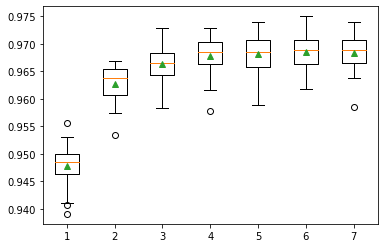

In [77]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [78]:
# Investigate all the elements whithin each Feature 

for column in df_merge:
    unique_vals = np.unique(df_merge[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :36457
The number of values for feature CODE_GENDER :2 -- ['F' 'M']
The number of values for feature FLAG_OWN_CAR :2 -- ['N' 'Y']
The number of values for feature FLAG_OWN_REALTY :2 -- ['N' 'Y']
The number of values for feature AMT_INCOME_TOTAL :265
The number of values for feature NAME_INCOME_TYPE :5 -- ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
The number of values for feature NAME_EDUCATION_TYPE :5 -- ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
The number of values for feature NAME_FAMILY_STATUS :5 -- ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
The number of values for feature NAME_HOUSING_TYPE :6 -- ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
The number of values for feature DAYS_BIRTH :7183
The number of values for feature DAYS_EMPLOYED :3640
The number

In [79]:
# Checking for null values
df_merge.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
pay_off                0
#_of_overdues          0
no_loan                0
target                 0
dtype: int64

In [80]:
df_merge.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'pay_off', '#_of_overdues',
       'no_loan', 'target'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/F

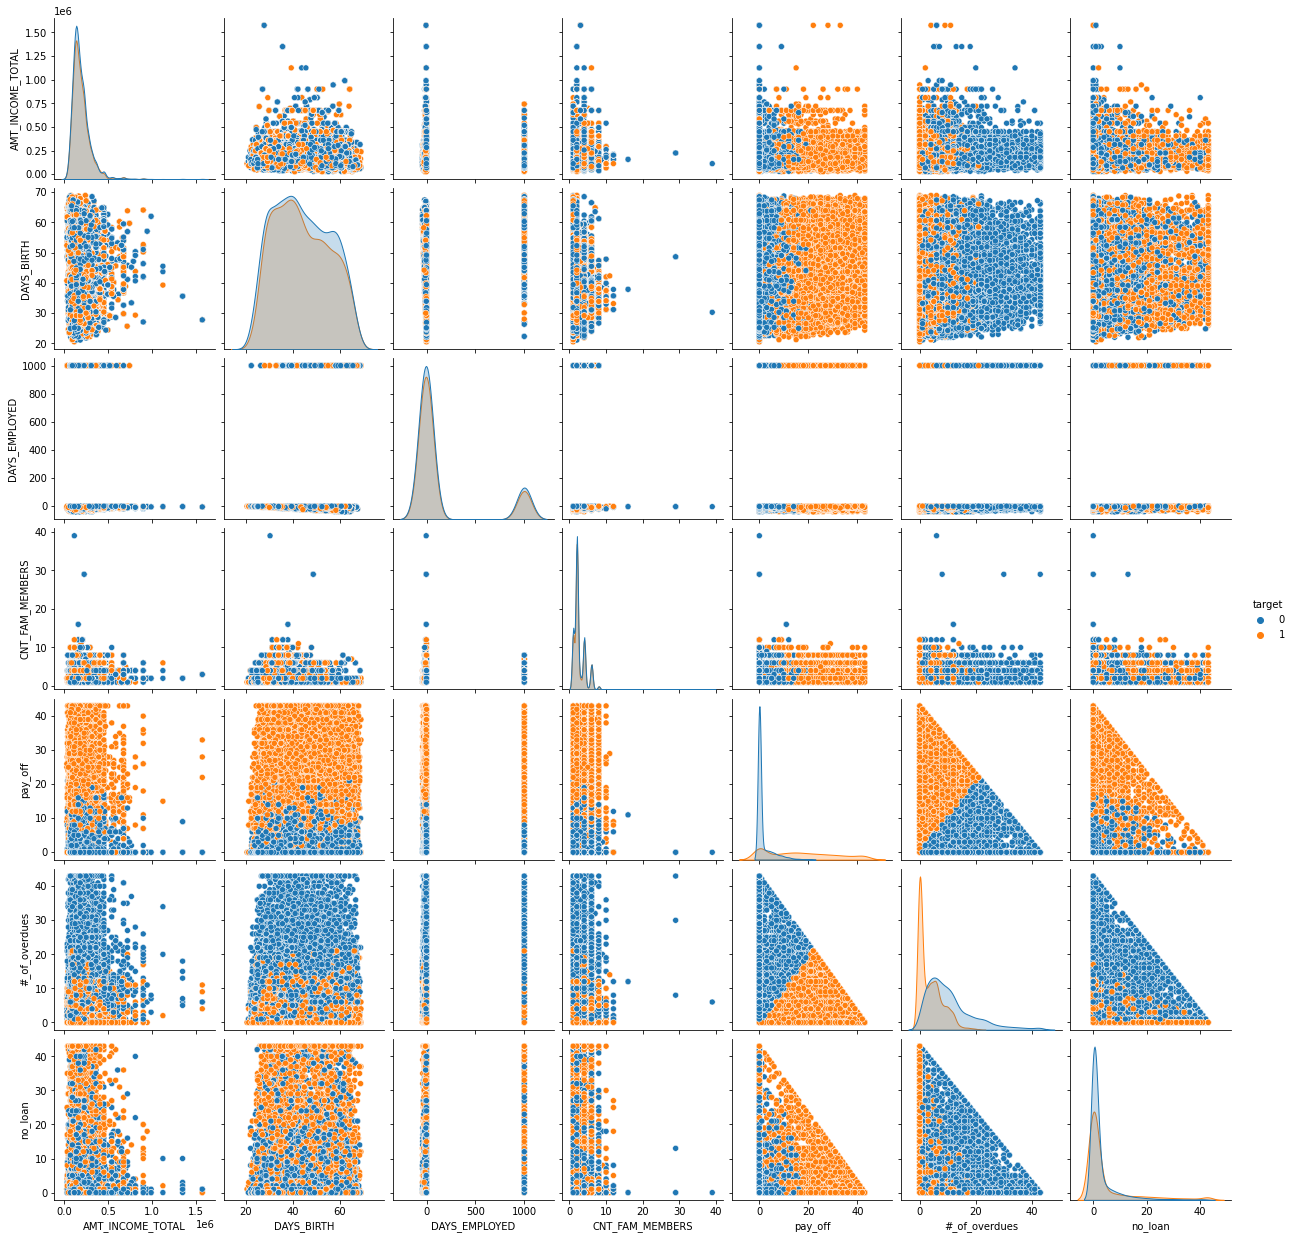

In [81]:
df_merge2 = df_merge[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'pay_off', '#_of_overdues',
       'no_loan', 'target']]
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df_merge2, hue = 'target', diag_kws={'bw': 0.2})